In [1]:
from fastai2.vision.all import *

In [2]:
storage_path = Path('/storage')
data_path = storage_path/'Columbia Gaze Data Set'
lbl_path = storage_path/'lr_with_center.csv'

# Load labels

In [3]:
df = pd.read_csv(lbl_path)
df.head()

path   target  \
0     /storage/Columbia Gaze Data Set/0016/0016_2m_0P_10V_10H.jpg    Right   
1   /storage/Columbia Gaze Data Set/0016/0016_2m_15P_10V_-10H.jpg     Left   
2   /storage/Columbia Gaze Data Set/0016/0016_2m_-30P_-10V_5H.jpg  HCenter   
3  /storage/Columbia Gaze Data Set/0016/0016_2m_-30P_10V_-15H.jpg     Left   
4     /storage/Columbia Gaze Data Set/0016/0016_2m_15P_0V_10H.jpg    Right   

   is_valid  
0     False  
1     False  
2     False  
3     False  
4     False

In [4]:
df.is_valid.value_counts()

False    4830
True     1050
Name: is_valid, dtype: int64

# Dataloaders

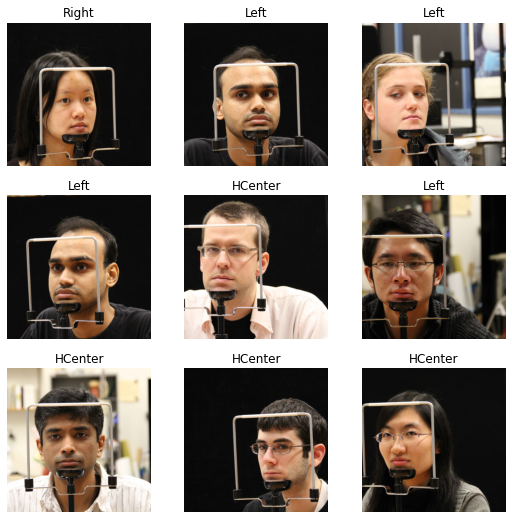

In [5]:
dls = ImageDataLoaders.from_df(df, '/', label_delim=' ', valid_col='is_valid',
                               item_tfms=Resize(512), batch_size=32)
dls.show_batch()

# Model init + finding learning rate

In [6]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(3)
learn.export(storage_path/'lr_resnet18_512_3epochs.pkl')

In [ ]:
dls = ImageDataLoaders.from_df(df, '/', label_delim=' ', valid_col='is_valid',
                               item_tfms=Resize(1024), batch_size=8)
learn.dls = dls
learn.fine_tune(3)
learn.export(storage_path/'lr_resnet18_1024_3epochs.pkl')